## clean Data

In [1]:
#import packages to work in data
import pandas as pd
import numpy as np
#to display data in plot 
import matplotlib.pyplot as plt

In [2]:
#Read data in python with pndas
df= pd.read_csv(r"D:\The University\Level 2\tranning\sprints\3\autos.csv")
#display head
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
#see info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [4]:
#describe about data
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


#### price , powerPS contain outliears beacuse (max !=75% , min !=50% ) and monthOfRegistration in real not contain 0

In [5]:
#delet col nrOfPictures because is not use in data
df.drop("nrOfPictures",axis =1,inplace = True)

In [6]:
# see duplicated in data
df.duplicated().sum()

0

In [7]:
#see data is clean or no
df.isnull().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

#### data is not duplicated but is not clean in col (vehicleType , gearbox , model , fuelType , notRepairedDamage ) i will remove null in data , but not all check in less null and less element then fill. 

In [8]:
# which contain col gearbox
df["gearbox"].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

##### contain 2 element in col then i will fill  

In [9]:
df["model"].value_counts

<bound method IndexOpsMixin.value_counts of 0                golf
1                 NaN
2               grand
3                golf
4               fabia
             ...     
371523            NaN
371524         fortwo
371525    transporter
371526           golf
371527        m_reihe
Name: model, Length: 371528, dtype: object>

##### contain many element in col then i will drop  

In [10]:
# to fill any null value relpace "null"
df["gearbox"].fillna(value="null",inplace = True)

In [11]:
#to display all col is clean
df.isnull().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

In [12]:
# to drop any null value 
df.dropna(axis=0,inplace = True)

In [13]:
df.isnull().sum()

index                  0
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

### finally data is clean but contain outliers

# outliers problem

In [14]:
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,265374.000000,2.653740e+05,265374.000000,265374.000000,265374.000000,265374.000000,265374.000000
mean,185728.264506,8.149938e+03,2003.300372,125.159778,124107.297625,6.186469,51789.094188
std,107281.428166,3.404476e+05,6.509969,144.688413,39824.723884,3.477183,25837.334404
min,3.000000,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,92706.250000,1.500000e+03,1999.000000,75.000000,100000.000000,3.000000,31224.000000
50%,185714.500000,3.800000e+03,2004.000000,116.000000,150000.000000,6.000000,51069.000000
75%,278660.750000,8.500000e+03,2008.000000,150.000000,150000.000000,9.000000,72760.000000
max,371527.000000,1.000000e+08,2018.000000,20000.000000,150000.000000,12.000000,99998.000000


##### Also find outliers after clean price , powerPS contain outliears beacuse (max !=75% , min !=50% ) and monthOfRegistration (1-12)in real 

In [15]:
# copy data to be refrance data
data = df.copy()
# display data
data

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
7,7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,19348,2016-03-25 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,371520,2016-03-19 19:53:49,turbo_defekt,privat,Angebot,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,96465,2016-03-19 20:44:43
371521,371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,26624,2016-03-29 10:17:23
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87439,2016-04-07 07:15:26


In [17]:
data.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,265374.000000,2.653740e+05,265374.000000,265374.000000,265374.000000,265374.000000,265374.000000
mean,185728.264506,8.149938e+03,2003.300372,125.159778,124107.297625,6.186469,51789.094188
std,107281.428166,3.404476e+05,6.509969,144.688413,39824.723884,3.477183,25837.334404
min,3.000000,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,92706.250000,1.500000e+03,1999.000000,75.000000,100000.000000,3.000000,31224.000000
50%,185714.500000,3.800000e+03,2004.000000,116.000000,150000.000000,6.000000,51069.000000
75%,278660.750000,8.500000e+03,2008.000000,150.000000,150000.000000,9.000000,72760.000000
max,371527.000000,1.000000e+08,2018.000000,20000.000000,150000.000000,12.000000,99998.000000


##### delet row is cotain less than 500 price because is not logic be car 1 dollar and price greter than 1000000 to less gab in outliers
#### delet row  contain zero in col monthOfRegistration because is not logic 
#### delet row  contain zero in col powerPS to less gab in outliers

In [18]:
# delet rows greater than 0 in col monthOfRegistration
data = data[data.monthOfRegistration > 0]

In [19]:
# delet rows greater than 300 in col price
data = data[data.price>300]

In [20]:
# delet rows less than 55000 in col price
data = data[data.price<55000]

In [21]:
# delet rows greater than 50 in col powerPS
data = data[data.powerPS >50]

In [22]:
data.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,234324.000000,234324.000000,234324.000000,234324.000000,234324.000000,234324.000000,234324.000000
mean,185765.712752,6884.500559,2003.859908,133.245540,123407.760195,6.374622,52381.961190
std,107286.870437,7337.597454,6.122491,137.958733,39847.568353,3.348585,25785.422166
min,3.000000,301.000000,1931.000000,51.000000,5000.000000,1.000000,1067.000000
25%,92682.250000,1890.000000,2000.000000,90.000000,100000.000000,3.000000,31812.000000
50%,185788.500000,4300.000000,2004.000000,120.000000,150000.000000,6.000000,51674.000000
75%,278714.250000,9000.000000,2008.000000,160.000000,150000.000000,9.000000,73278.000000
max,371527.000000,54999.000000,2018.000000,20000.000000,150000.000000,12.000000,99998.000000


# visualization 

In [23]:
# which contain data in col abtest
df["abtest"].value_counts() 

test       137902
control    127472
Name: abtest, dtype: int64

In [25]:
# describe col price
data.groupby("price").describe()

index                                                               \
      count           mean            std       min        25%       50%   
price                                                                      
301     4.0   39945.000000   39793.281602    4895.0    8543.75   33390.5   
305     1.0   99112.000000            NaN   99112.0   99112.00   99112.0   
308     1.0  267696.000000            NaN  267696.0  267696.00  267696.0   
310     3.0  166766.333333  124501.459077   24275.0  122885.50  221496.0   
316     1.0  336960.000000            NaN  336960.0  336960.00  336960.0   
...     ...            ...            ...       ...        ...       ...   
54950   3.0  209583.333333  119542.057211  130790.0  140808.50  150827.0   
54980   2.0  101426.000000   16336.995073   89874.0   95650.00  101426.0   
54990   4.0  218180.500000  133646.029028   74941.0  121323.25  221342.0   
54997   1.0   72063.000000            NaN   72063.0   72063.00   72063.0   
54999   4.0  167022.250000  100172.652081   54431.0  101914.25  167450.5   

                           yearOfRegistration               ...  \
             75%       max              count         mean  ...   
price                                                       ...   
301     64791.75   88104.0                4.0  2010.750000  ...   
305     99112.00   99112.0                1.0  2014.000000  ...   
308    267696.00  267696.0                1.0  2013.000000  ...   
310    238012.00  254528.0                3.0  1994.666667  ...   
316    336960.00  336960.0                1.0  2014.000000  ...   
...          ...       ...                ...          ...  ...   
54950  248980.00  347133.0                3.0  2013.000000  ...   
54980  107202.00  112978.0                2.0  2013.000000  ...   
54990  318199.25  355097.0                4.0  2000.750000  ...   
54997   72063.00   72063.0                1.0  2006.000000  ...   
54999  232558.50  278757.0                4.0  2010.250000  ...   

      monthOfRegistration       postalCode                                   \
                      75%   max      count      mean           std      min   
price                                                                         
301                  4.00  10.0        4.0  78110.25   8764.500000  73728.0   
305                  8.00   8.0        1.0  45356.00           NaN  45356.0   
308                  3.00   3.0        1.0  54341.00           NaN  54341.0   
310                  9.50  10.0        3.0  45287.00  46897.602679   6124.0   
316                  5.00   5.0        1.0  65604.00           NaN  65604.0   
...                   ...   ...        ...       ...           ...      ...   
54950                7.00   8.0        3.0  56104.00  31997.051599  31655.0   
54980                6.00   6.0        2.0  74541.00      0.000000  74541.0   
54990                7.25  11.0        4.0  52471.00  12587.635494  36381.0   
54997                2.00   2.0        1.0  86911.00           NaN  86911.0   
54999               10.25  11.0        4.0  59605.50  19683.446522  37079.0   

                                             
            25%      50%       75%      max  
price                                        
301    73728.00  73728.0  78110.25  91257.0  
305    45356.00  45356.0  45356.00  45356.0  
308    54341.00  54341.0  54341.00  54341.0  
310    19301.50  32479.0  64868.50  97258.0  
316    65604.00  65604.0  65604.00  65604.0  
...         ...      ...       ...      ...  
54950  37997.00  44339.0  68328.50  92318.0  
54980  74541.00  74541.0  74541.00  74541.0  
54990  48204.75  53218.0  57484.25  67067.0  
54997  86911.00  86911.0  86911.00  86911.0  
54999  46939.25  60202.0  72868.25  80939.0  

[4523 rows x 48 columns]

<Axes: ylabel='monthOfRegistration'>

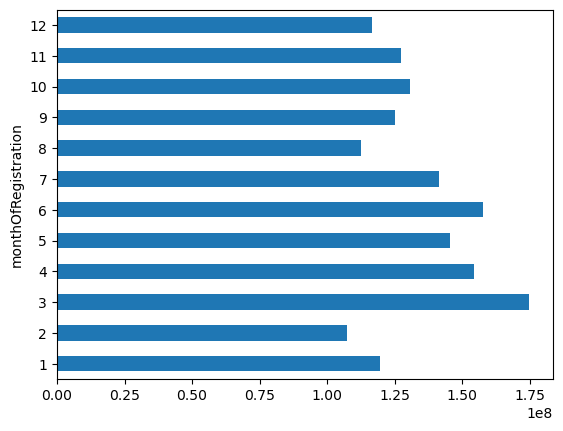

In [26]:
# show big price in moth by groupby monthOfRegistration with function sum
data.groupby("monthOfRegistration")["price"].sum().plot.barh()

##### big price  in moth 3

In [27]:
# show big price in moth by groupby yearOfRegistration with function sum
data.groupby("yearOfRegistration")["price"].sum()

yearOfRegistration
1931       39999
1937       42000
1941       26900
1942       14499
1943       34899
          ...   
2014    88656181
2015    57938557
2016     6049665
2017       35799
2018        3550
Name: price, Length: 77, dtype: int64

## Model

#### create two model Regression ( Random Forest , multiple regression ) becuase data is continuous then applay regression model
#### predicte target (price) , with feuters ( 'monthOfRegistration', "kilometer" ,"yearOfRegistration", "powerPS" )

### 1- mltiple regression

In [28]:
# Select the columns to use for the model
cols = ['monthOfRegistration', "kilometer" ,"yearOfRegistration", "powerPS"]
x = data[cols] # fetuers 
y = data['price'] # target

In [29]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
# Apply LinearRegression Algorithm  
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# create y_pred (predict X_test ) to compare with y_test
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
# by r2_score find Accuracy of model
r_02 = r2_score(y_test, y_pred)
print('Accuracy:', r_02)

Accuracy: 0.4145753823562449


### 2- Random Forest

In [33]:
# Select the columns to use for the model
cols = ['monthOfRegistration', "kilometer" ,"yearOfRegistration", "powerPS"]
x = data[cols]
y = data['price']

In [34]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
# Apply RandomForestRegressor Algorithm 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# create y_pred (predict X_test ) to compare with y_test
y_pred = rf_model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
# show the MSE and Accuracy
mse = mean_squared_error(y_test, y_pred)
r_12 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Accuracy:", r_12)

Mean Squared Error: 9281600.887341745
Accuracy: 0.8299179618403765


In [38]:
#create dic to conclusion models
result = {"model": ["LinearRegression","RandomForest"], "Accuracy" : [r_02,r_12]}
con= pd.DataFrame(result)
#show all Accuracy
con

,model,Accuracy
0,LinearRegression,0.414575
1,RandomForest,0.829918


#### at the end Accuracy RandomForest greater than Accuracy linear Regression

In [40]:
# Extract data
data.to_csv("edit_auto",index=False)